# Visualising DataFrames

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
# Get total body mass by gender
mass_by_sex = penguins.groupby("sex")["body_mass_g"].sum()
mass_by_sex

sex
Female    637275.0
Male      763675.0
Name: body_mass_g, dtype: float64

<Axes: xlabel='sex'>

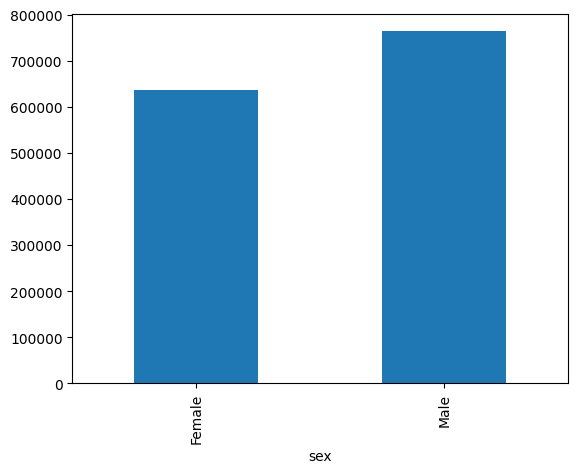

In [10]:
mass_by_sex.plot(kind="bar")

In [12]:
taxis = sns.load_dataset("taxis")
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [16]:
# total number of tips by dropoff day
taxis["dropoff_day"] = taxis["dropoff"].dt.day
fares_by_day_of_month = taxis.groupby("dropoff_day")["tip"].sum()
fares_by_day_of_month.head()

dropoff_day
1    434.98
2    331.15
3    312.46
4    340.30
5    420.42
Name: tip, dtype: float64

<Axes: xlabel='dropoff_day'>

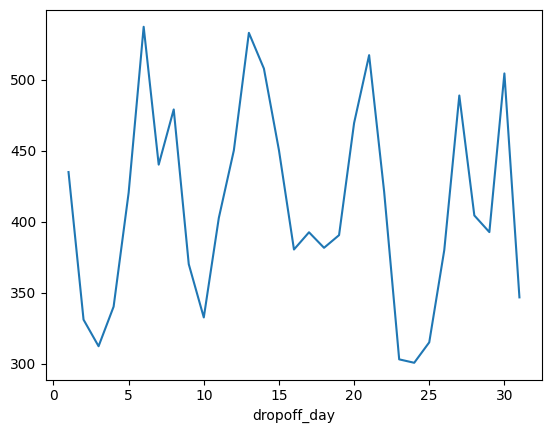

In [17]:
fares_by_day_of_month.plot(kind="line")

<Axes: title={'center': 'Tip amount relating to distance travelled'}, xlabel='distance', ylabel='tip'>

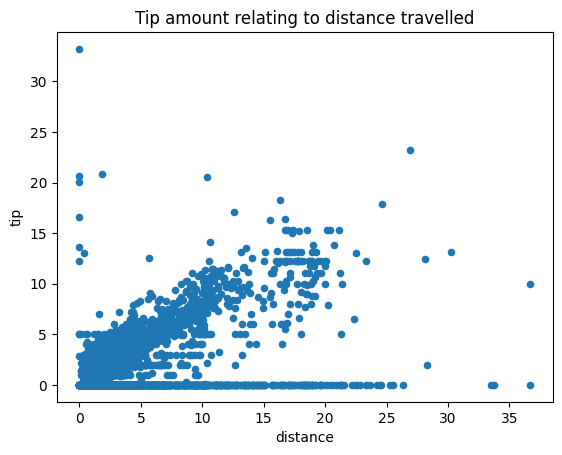

In [18]:
# relationship in  distance versus tip?
taxis.plot(kind="scatter", x="distance", y="tip", title="Tip amount relating to distance travelled")

<Axes: title={'center': 'Fare amount relating to distance travelled'}, xlabel='distance', ylabel='fare'>

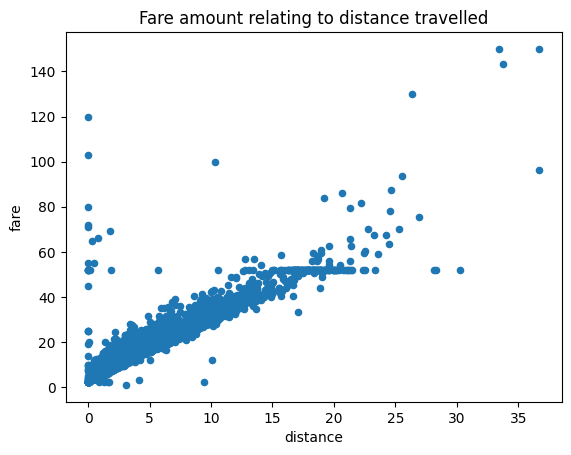

In [19]:
# relationship in  distance versus fare?
taxis.plot(kind="scatter", x="distance", y="fare", title="Fare amount relating to distance travelled")

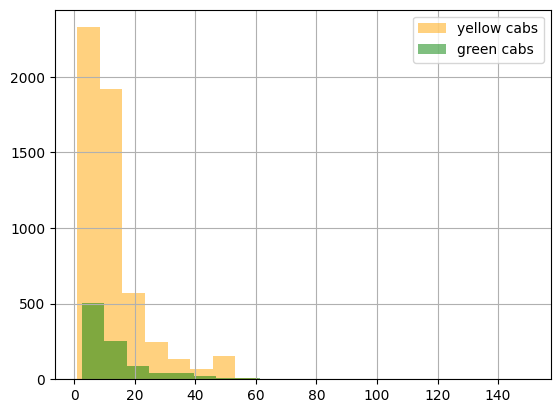

In [38]:
# Fare by taxi color?
taxis[taxis["color"] == "yellow"]["fare"].hist(color="orange", bins=20, alpha=0.5)
taxis[taxis["color"] == "green"]["fare"].hist(color="green", bins=20, alpha=0.5)
plt.legend(["yellow cabs", "green cabs"])

***
## Missingness

In [40]:
penguins.isna().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [41]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<Axes: >

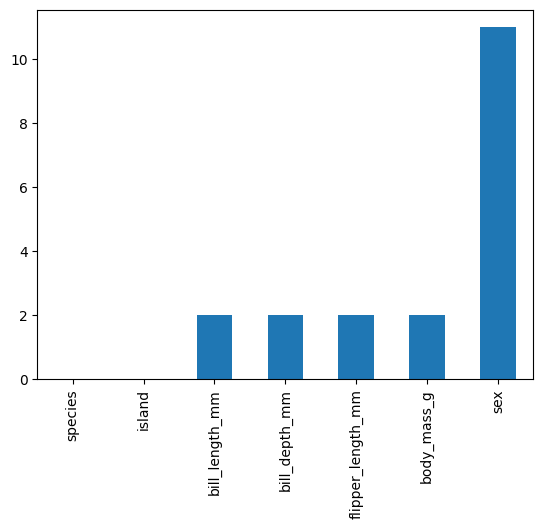

In [43]:
penguins.isna().sum().plot(kind="bar")

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

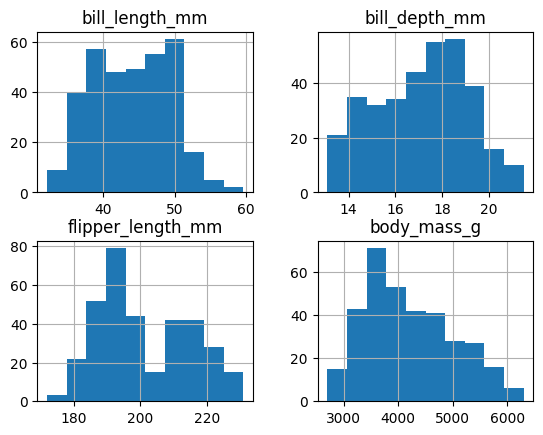

In [49]:
# Filling missing values affects dist
miss_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]
penguins[miss_cols].hist()

<Axes: >

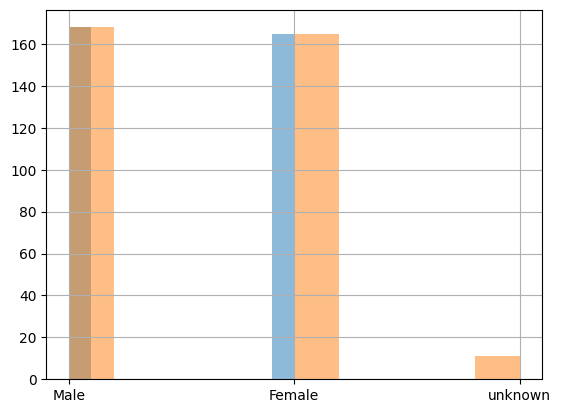

In [53]:
penguins["sex"].hist(alpha=0.5)
penguins_filled = penguins.fillna("unknown")
penguins_filled["sex"].hist(alpha=0.5)